In [41]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import scipy

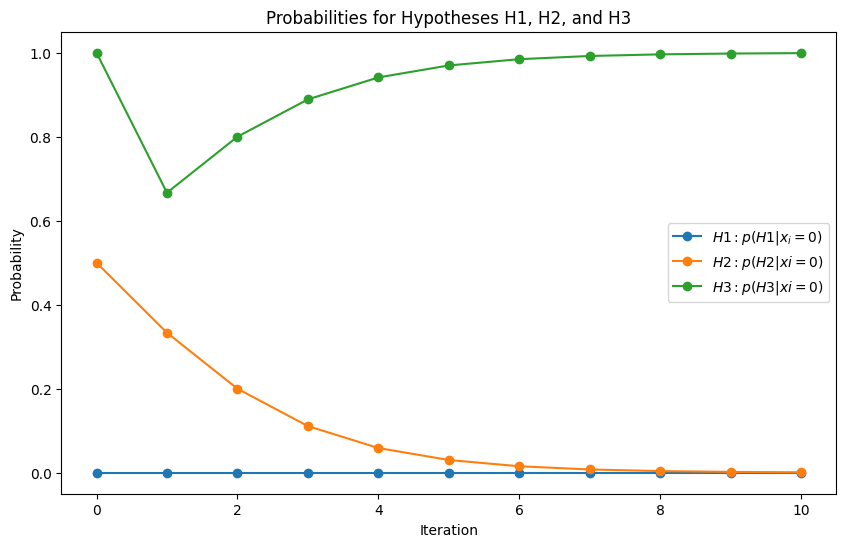

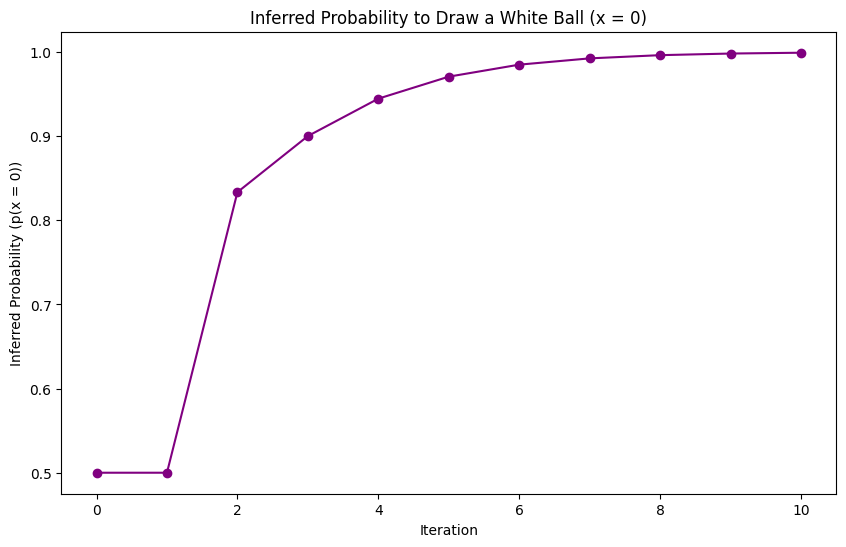

In [42]:
import matplotlib.pyplot as plt

# Prior probabilities for hypotheses
prior_probs = [1/3, 1/3, 1/3]

# Number of iterations
num_iterations = 10

# Initialize empty lists to store probabilities for each hypothesis and Bayesian updates
probabilities_H1 = [0]
probabilities_H2 = [1/2]
probabilities_H3 = [1]
bayesian_updates = [1/2]

# Perform Bayesian inference for each iteration
for iteration in range(num_iterations):
    # Likelihood: Probability of drawing a white ball given the hypothesis
    likelihood_H1 = 0
    likelihood_H2 = 1/2
    likelihood_H3 = 1
    c = 1/((likelihood_H1 * prior_probs[0]) + (likelihood_H2 * prior_probs[1]) + (likelihood_H3 * prior_probs[2]))
    
    # Bayesian update using Bayes' theorem
    posterior_H1 = (likelihood_H1 * prior_probs[0]) * c
    posterior_H2 = (likelihood_H2 * prior_probs[1]) * c
    posterior_H3 = (likelihood_H3 * prior_probs[2]) * c

    # Store updated probabilities for each hypothesis
    probabilities_H1.append(posterior_H1)
    probabilities_H2.append(posterior_H2)
    probabilities_H3.append(posterior_H3)
    
    # Store Bayesian update for p(x = 0)
    bayesian_updates.append(posterior_H1/c+posterior_H2/c+posterior_H3/c)

    # Update prior probabilities for the next iteration
    prior_probs = [posterior_H1, posterior_H2, posterior_H3]

# Plot the probabilities for each hypothesis over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations+1), probabilities_H1, marker='o', label='$H1: p(H1 | x_i = 0)$')
plt.plot(range(num_iterations+1), probabilities_H2, marker='o', label='$H2: p(H2 | xi = 0)$')
plt.plot(range(num_iterations+1), probabilities_H3, marker='o', label='$H3: p(H3 | xi = 0)$')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Probabilities for Hypotheses H1, H2, and H3')
plt.legend()
plt.show()

# Plot the inferred probability to draw a white ball (x = 0) for each Bayesian update
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations+1), bayesian_updates, marker='o', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Inferred Probability (p(x = 0))')
plt.title('Inferred Probability to Draw a White Ball (x = 0)')
plt.show()
